## Parte 1 del Ejercicio 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import csv

%matplotlib inline
rcParams['figure.figsize'] = (10,10)

### Caja con puntos en una malla cuadriculada

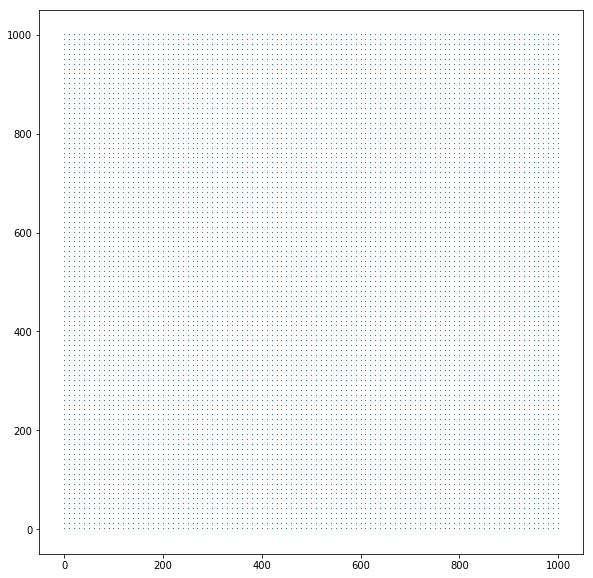

In [6]:
lado = 1000 #Tamaño de la caja
xmalla, ymalla = [], []

#Puntos de la malla cuadriculada. Los guardamos en un archivo llamado malla.txt
for i in range(0, lado+1, 10):
    for j in range(0, lado+1, 10):
        xmalla.append(j)
        ymalla.append(i)

with open("malla.txt", "w") as malla:
    writer = csv.writer(malla, delimiter = '\t')
    writer.writerows(zip(xmalla,ymalla))

#Caja de malla cuadriculada
plt.plot(xmalla,ymalla, ',')
plt.gca().set_aspect('equal')

### Caja con puntos aleatorios en disco de radio 300

(0, 1000)

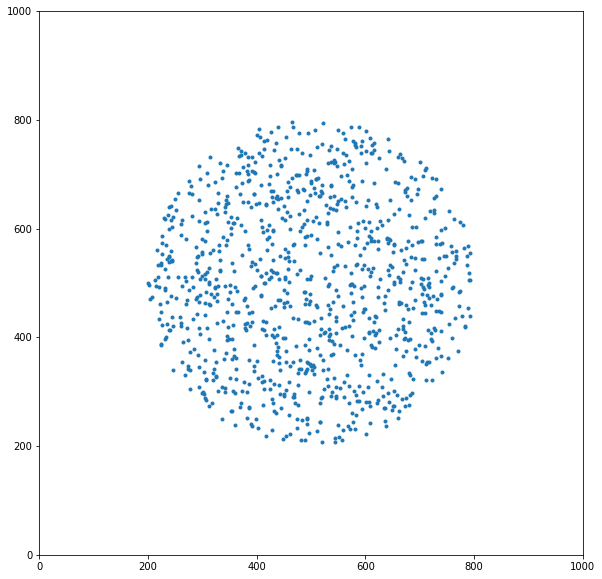

In [5]:
lado = 1000 #Tamaño de la caja
radio = 300 #Radio del disco
puntos = 1000 #Numero de puntos en la caja

i = 0
xdisco, ydisco = [], []

#Generamos los puntos aleatorios en el disco
while i < puntos:
    
    #X y Y son las coordenadas de los puntos
    X = lado*np.random.random()
    Y = lado*np.random.random()
    
    if (X-lado*0.5)**2 + (Y-lado*0.5)**2 > radio**2: #Si las coordenadas estan fuera del circulo las descartamos
        continue
        
    #Agregamos al arreglo las coordenadas que esten dentro del disco
    xdisco.append(X)
    ydisco.append(Y)
    i += 1

with open("disco.txt", "w") as disco:
    writer = csv.writer(disco, delimiter = '\t')
    writer.writerows(zip(xdisco,ydisco))

#Graficamos el disco
plt.plot(xdisco,ydisco, '.')
plt.gca().set_aspect('equal')
plt.xlim(0, lado)
plt.ylim(0, lado)

In [3]:
def anillo(R, r, c, puntos, lado): #Radio mayor, radio menor, centro, numero de puntos, lado de la caja
    x0, y0 = c
    i = 0 #Contador
    x, y = [], [] #Arreglos de las coordenadas
    
    #Generamos los puntos aleatorios en el anillo
    while i < puntos:
        
        #X y Y son las coordenadas de los puntos
        X = lado*np.random.random()
        Y = lado*np.random.random()
        
        if (X-x0)**2 + (Y-y0)**2 > R**2 or (X-x0)**2 + (Y-y0)**2 < r**2: #Si las coordenadas estan fuera del anillo las descartamos
            continue
            
        #Agregamos al arreglo las coordenadas que esten dentro del anillo y de la caja
        if (X < lado and X > 0) and (Y < lado and Y > 0):
            x.append(X)
            y.append(Y)
        i += 1
    #Graficamos el anillo
    return x, y

### Caja con puntos aleatorios en anillo de radios 290 y 300

(0, 1000)

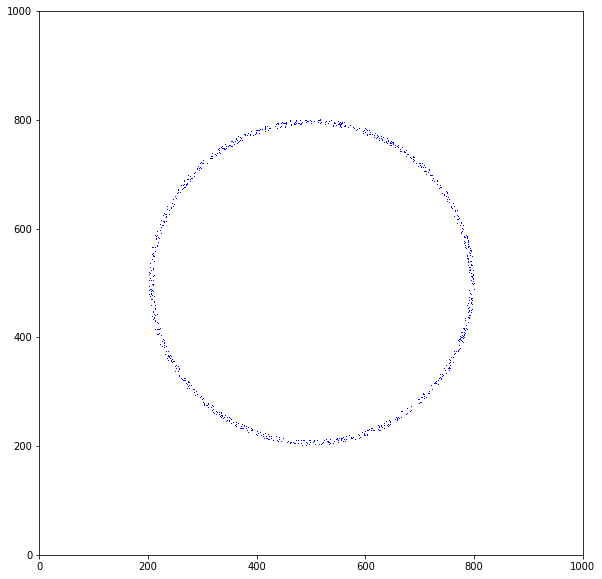

In [4]:
lado = 1000 #Tamaño de la caja
radioM = 300 #Radio mayor del anillo
radiom = 290 #Radio menor del anillo
puntos = 1000 #Numero de puntos en el anillo
c = (lado*0.5,lado*0.5) #Centro del anillo

xanillo, yanillo = anillo(radioM, radiom, c, puntos, lado)

with open("Anillo.txt", "w") as Anillo:
    writer = csv.writer(Anillo, delimiter = '\t')
    writer.writerows(zip(xanillo,yanillo))

plt.plot(xanillo,yanillo, 'b,')
plt.gca().set_aspect('equal')
plt.xlim(0, lado)
plt.ylim(0, lado)

### Caja con puntos aleatorios en anillos de centro y radio aleatorios

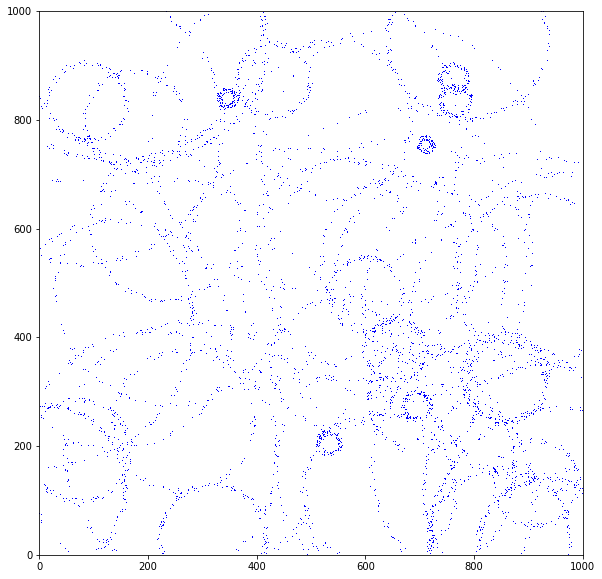

In [10]:
lado = 1000 #Lado de la caja
Nanillos = 50 #Numero de anillos
puntos = 100 #Numero de puntos en cada anillo

c = [(lado*np.random.random(), lado*np.random.random()) for i in range(Nanillos)] #Centros de los anillos
r = [radiom*np.random.random() for i in range(Nanillos)] #Radios aleatorios de los anillos

#Graficamos cada anillo

xanillos, yanillos = [0 for i in range(Nanillos)], [0 for i in range(Nanillos)]
#Preparamos archivo para guardar coordenadas
with open("anillos.txt", "w") as anillos:
    writer=csv.writer(anillos, delimiter = '\t')
    #Creamos los anillos
    for i in range(Nanillos):
        xanillos[i], yanillos[i] = anillo(r[i] + 10, r[i], c[i], puntos, lado)
    
        writer.writerows(zip(xanillos[i], yanillos[i])) #Guardamos coordenadas
    
        plt.plot(xanillos[i],yanillos[i], 'b,')
        plt.gca().set_aspect('equal')
        plt.xlim(0, lado)
        plt.ylim(0, lado)

### Caja con puntos aleatorios en anillos de centro aleatorio y radio fijo

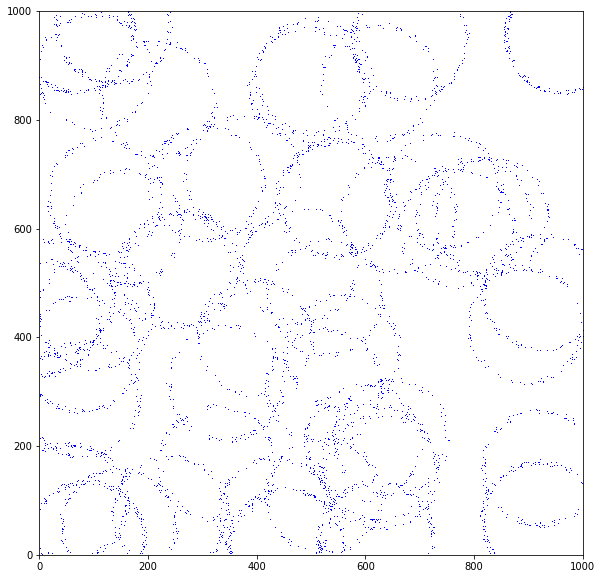

In [11]:
lado = 1000 #Lado de la caja
Nanillos = 50 #Numero de anillos
puntos = 100 #Numero de puntos en cada anillo
r = 100 #Radio menor de los anillos
R = r +10 #Radio mayor de los anillos

c = [(lado*np.random.random(), lado*np.random.random()) for i in range(Nanillos)] #Centros de los anillos

xAnillos, yAnillos = [0 for i in range(Nanillos)], [0 for i in range(Nanillos)]

#Preparamos archivo para guardar datos
with open('anillosr.txt', 'w') as anillosr:
    writer = csv.writer(anillosr, delimiter='\t')
    #Creamos coordenadas
    for i in range(Nanillos):
        xAnillos[i], yAnillos[i] = anillo(R, r, c[i], puntos, lado)
    
        writer.writerows(zip(xAnillos[i], yAnillos[i])) #Guardamos las coordeadas en el archivo
    
        plt.plot(xAnillos[i],yAnillos[i], 'b,')
        plt.gca().set_aspect('equal')
        plt.xlim(0, lado)
        plt.ylim(0, lado)


## Parte 2

In [3]:
def caja_aleatoria(lado, Npuntos):
    X, Y = [lado * np.random.random() for i in range(Npuntos)], [lado * np.random.random() for i in range(Npuntos)]
    
    with open("random.txt", "w") as random:
        writer = csv.writer(random, delimiter = '\t')
        writer.writerows(zip(X,Y))
        
    plt.plot(X,Y, '.')
    plt.gca().set_aspect('equal')
    plt.xlim(0, lado)
    plt.ylim(0, lado)
    
    return X, Y

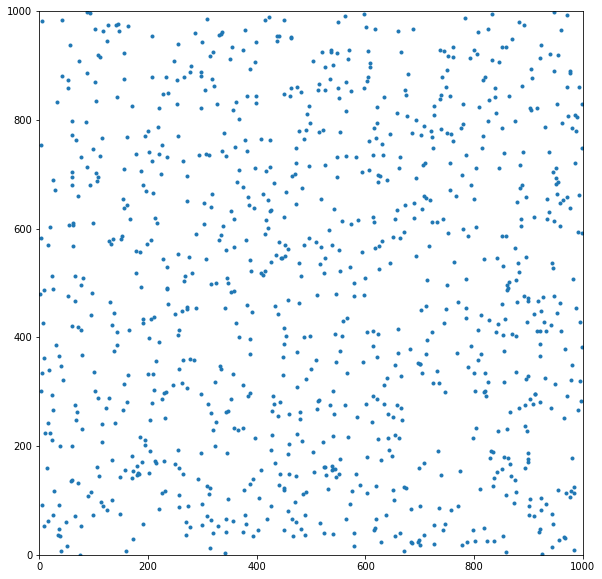

In [4]:
xrandom, yrandom = caja_aleatoria(1000, 1000)

In [5]:
def distancia(x1,y1,x2,y2):
    n = len(x1)
    d = [0 for i in range(int(n*(n-1)/2))]
    k = 0
    for i in range(n-1):
        for j in range(i+1, n):
            d[k] = (np.sqrt((x2[j]-x1[i])**2 + (y2[j]-y1[i])**2))
            k += 1
    return d

In [6]:
d = distancia(xrandom, yrandom, xrandom, yrandom)


(array([2.5320e+03, 6.9440e+03, 1.0680e+04, 1.4200e+04, 1.7091e+04,
        1.9736e+04, 2.2037e+04, 2.3851e+04, 2.5155e+04, 2.6335e+04,
        2.7084e+04, 2.7541e+04, 2.7365e+04, 2.7168e+04, 2.6454e+04,
        2.5718e+04, 2.4653e+04, 2.3501e+04, 2.1701e+04, 1.9712e+04,
        1.8094e+04, 1.5950e+04, 1.3536e+04, 1.0624e+04, 7.6660e+03,
        5.0860e+03, 3.4290e+03, 2.3120e+03, 1.4090e+03, 8.9700e+02,
        5.3900e+02, 3.1300e+02, 1.3100e+02, 4.6000e+01, 1.0000e+01]),
 array([1.08133570e+00, 4.04976012e+01, 7.99138666e+01, 1.19330132e+02,
        1.58746398e+02, 1.98162663e+02, 2.37578929e+02, 2.76995194e+02,
        3.16411459e+02, 3.55827725e+02, 3.95243990e+02, 4.34660256e+02,
        4.74076521e+02, 5.13492787e+02, 5.52909052e+02, 5.92325318e+02,
        6.31741583e+02, 6.71157849e+02, 7.10574114e+02, 7.49990380e+02,
        7.89406645e+02, 8.28822911e+02, 8.68239176e+02, 9.07655442e+02,
        9.47071707e+02, 9.86487973e+02, 1.02590424e+03, 1.06532050e+03,
        1.10473677

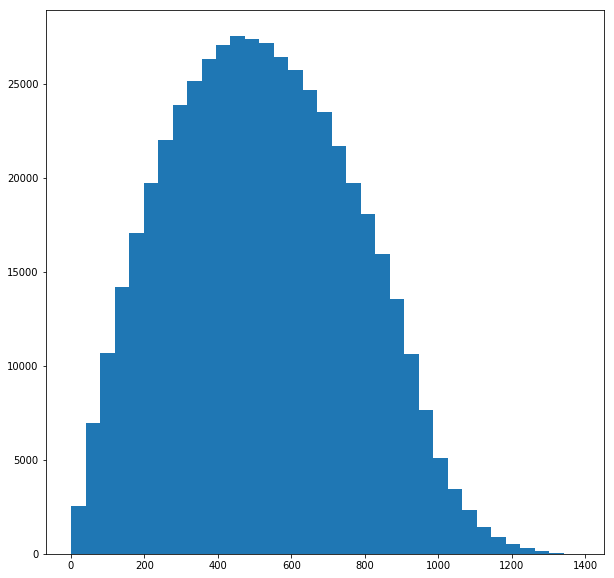

In [7]:
plt.hist(d, bins=35)